# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [88]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2 Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

Load **all_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

Hint: Use `pd.read_csv()`


In [89]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Step 3 Examine The Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What six countries are represented in the data?

**The 6 countries represented are:**
* Chile
* China
* Germany
* Mexico
* USA
* Zimbabwe

What years are represented in the data?

* The years represented in the data are: **2000-2015**

## Step 4 Tweak The DataFrame

Look at the column names of the DataFrame `df` using `.head()`. 

In [90]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


What do you notice? The first two column names are one word each, and the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. 

**Revise The DataFrame Part A:** 

Use Pandas to change the name of the last column to `LEABY`.

Hint: Use `.rename()`. [You can read the documentation here.](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)). </font>

In [91]:
df = df.rename(index=str, columns={"Life expectancy at birth (years)": "LEABY"})

Run `df.head()` again to check your new column name worked.

In [92]:
print(df.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


---

## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 
Remember to `plt.show()` your chart!

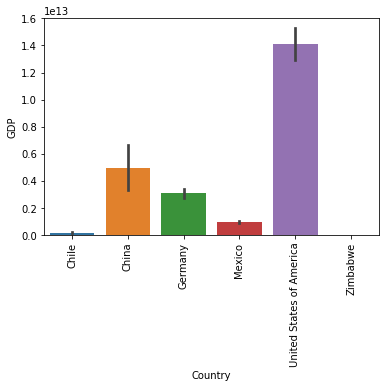

In [192]:
sns.barplot(data=df, x='Country', y='GDP')
plt.xticks(rotation='90')
plt.show()

B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.
Remember to `plt.show()` your chart!

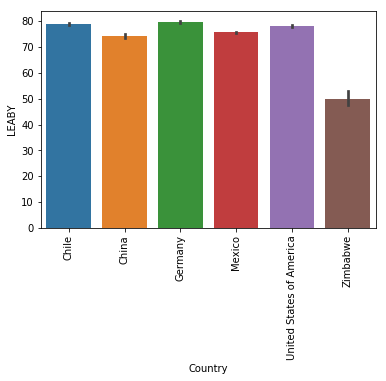

In [193]:
sns.barplot(data=df, x='Country', y='LEABY')
plt.xticks(rotation='90')
plt.show()

What do you notice about the two bar charts? Do they look similar?

* The two bar charts are not very similar. There does not seem to be any strong correlation between GDP and LEABY.
* However, Zimbabwe looks like the lowest on both counts, which could be a correlation, but not necessarily causation.
* Similarly, the USA is high on both counts, again pointing towards a positive correlation.

## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

We have added the code to instantiate a figure with the correct dimmensions to observe detail. 
1. Create an `sns.violinplot()` for the dataframe `df` and map `Country` and `LEABY` as its respective `x` and `y` axes. 
2. Be sure to show your plot

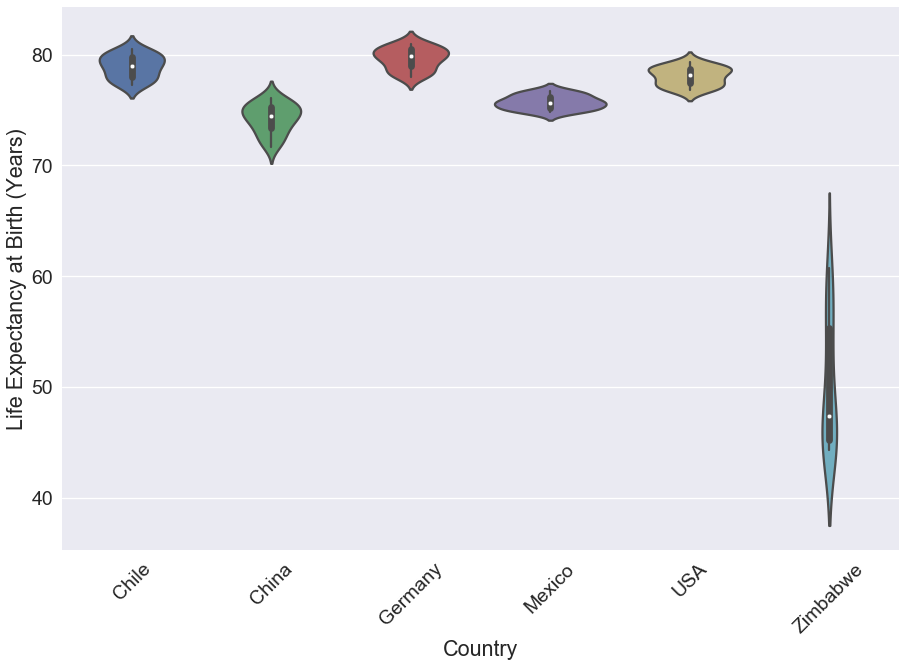

In [224]:
sns.set(style='darkgrid', rc={"grid.linewidth": 0.1})
sns.set_context("talk", font_scale=1.5) 

fig, ax = plt.subplots(figsize=(15, 10)) 

sns.violinplot(data=df, x='Country', y='LEABY')

# label the axes and give a title
plt.ylabel('Life Expectancy at Birth (Years)')
#plt.title('Life Expectancy at Birth in Years for various Countries')
plt.xticks(rotation='45')
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
#plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])

# Save the figure
plt.savefig('violinPlot.png')

plt.show()

What do you notice about this distribution? Which country's life expactancy has changed the most?

* Most of the countries shown have a relatively stable LEABY, with little distribution. The USA seems to be developing a bi-modal distribution, which could be an indicator of income inequality in a privatised-healthcare society.
* Zimbabwe's LEABY values are far more distributed than those of other countries. This indicates that the life expectancy in Zimbabwe is undergoing quite a rapid change, as well as being unstable.

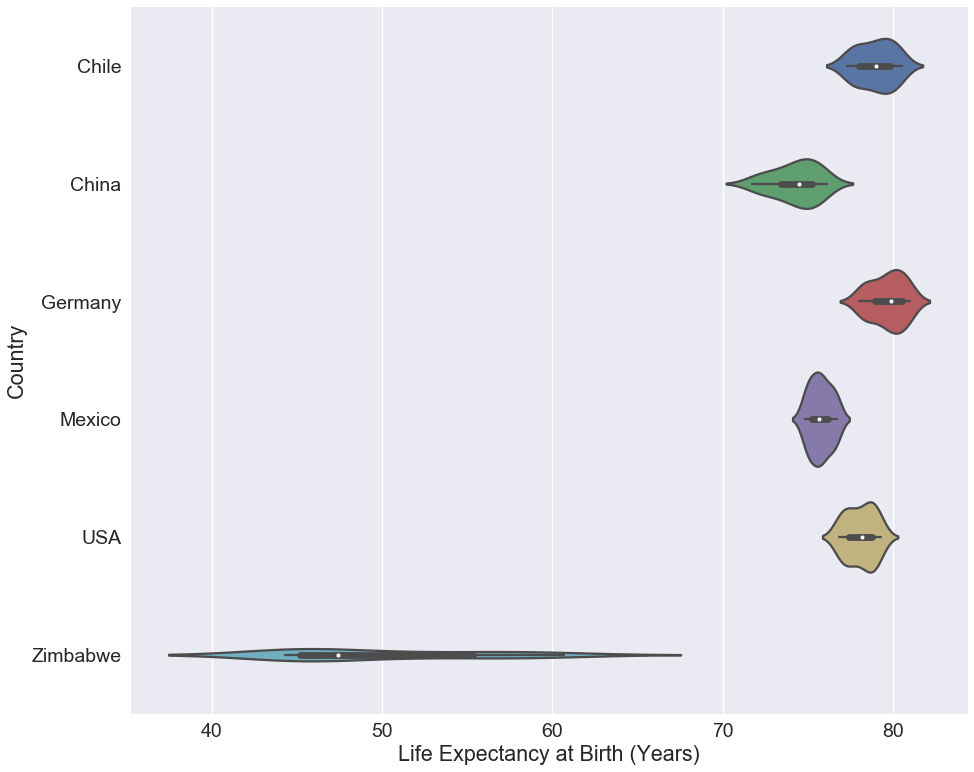

In [236]:
# Try a sideways violin plot in case that's clearer

sns.set(style='darkgrid', rc={"grid.linewidth": 0.1})
sns.set_context("talk", font_scale=1.5) 

fig, ax = plt.subplots(figsize=(15, 13)) 

#sns.violinplot(data=df, x='Country', y='LEABY')
sns.violinplot(data=df, x='LEABY', y='Country')

# label the axes and give a title
plt.xlabel('Life Expectancy at Birth (Years)')
#plt.title('Life Expectancy at Birth in Years for various Countries')
ax.set_yticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])

# Save the figure
plt.savefig('violinPlot_horizontal.png')

plt.show()

## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, we can plot the progession of GDPs over the years by country in a barplot using Seaborn.
We have set up a figure with the correct dimensions for your plot. Under that declaration:
1. Save `sns.barplot()` to a variable named `ax`
2. Chart `Country` on the x axis, and `GDP` on the `Y` axis on the barplot. Hint: `ax = sns.barplot(data=df, x="Country", y="GDP")`
3. Use the `Year` as a `hue` to differentiate the 15 years in our data. Hint: `ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)`
4. Since the names of the countries are long, let's rotate their label by 90 degrees so that they are legible. Use `plt.xticks(rotation="90")`
5. Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to `"GDP in Trillions of U.S. Dollars"`. Hint: `plt.ylabel("GDP in Trillions of U.S. Dollars")`
6. Be sure to show your plot.


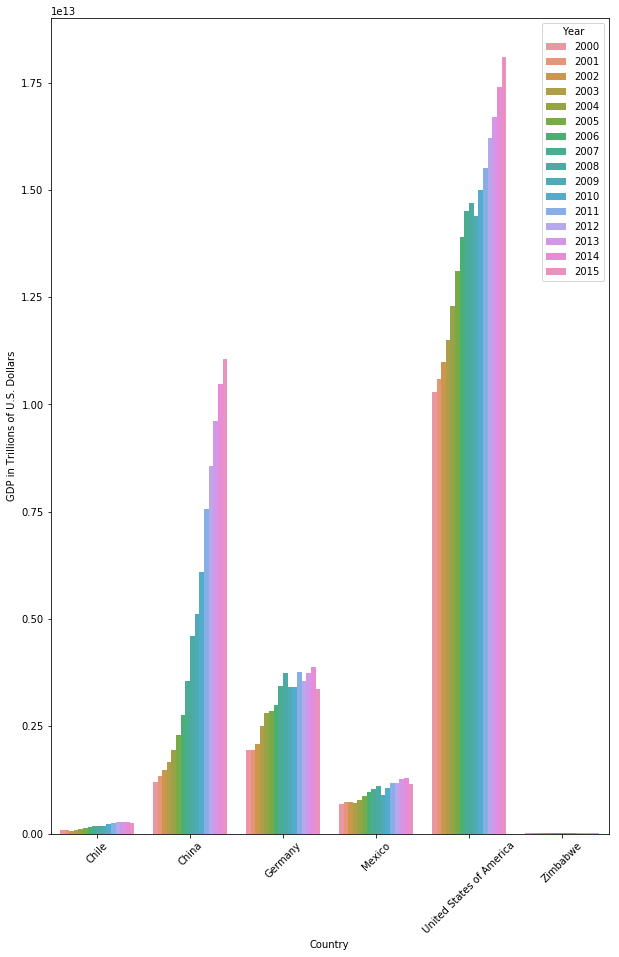

In [97]:
f, ax = plt.subplots(figsize=(10, 15)) 

ax = sns.barplot(data=df, x='Country', y='GDP', hue='Year')
plt.xticks(rotation='45') # I find 45 degrees to be a nicer angle
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.show()

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

The code will essentially be the same as above! The beauty of Seaborn relies in its flexibility and extensibility. Paste the code from above in the cell bellow, and: 
1. Change your `y` value to `LEABY` in order to plot life expectancy instead of GDP. Hint: `ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)`
2. Tweak the name of your `ylabel` to reflect this change, by making the label `"Life expectancy at birth in years"` Hint: `ax.set(ylabel="Life expectancy at birth in years")`


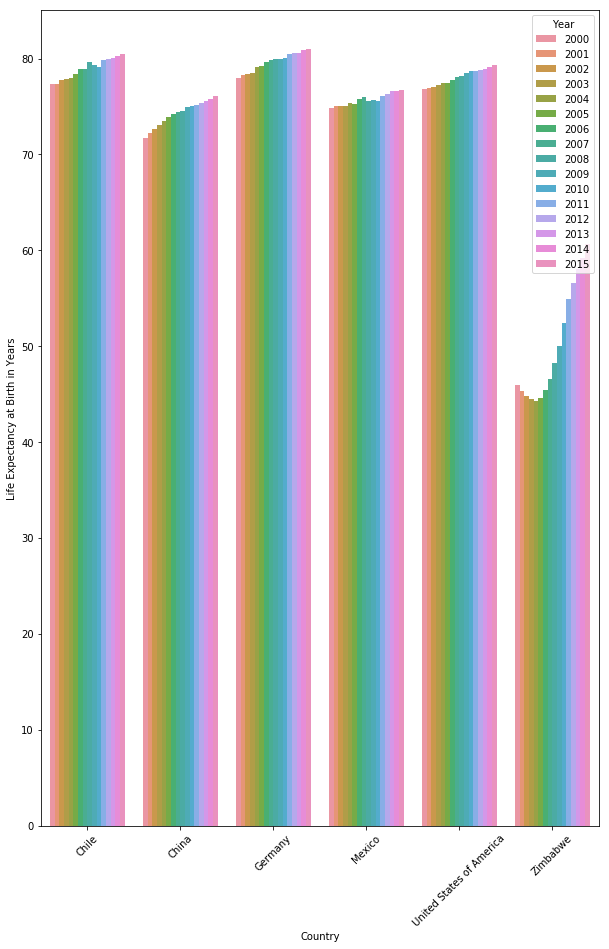

In [98]:
f, ax = plt.subplots(figsize=(10, 15)) 

ax = sns.barplot(data=df, x='Country', y='LEABY', hue='Year')
plt.xticks(rotation='45') # I find 45 degrees to be a nicer angle
plt.ylabel('Life Expectancy at Birth in Years')
plt.show()

What are your first impressions looking at the visualized data?

- Which countries' bars changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in GDP over time? 
- How do countries compare to one another?
- Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?
- Can you think of any reasons that the data looks like this for particular countries?

* Zimbabwe's LEABY bars change the most, but China's bars change the most for GDP.
* 2004-2015 is the biggest rate of change in LEABY for Zimbabwe, while 2008-2015 is the largest rate of change in GDP for China.
* Zimbabwe's GDP seems to change the least, but the axes are scaled to 'trillions of USD', and Zimbabwe's GDP is quite low.
* The LEABY graphs have the most similar data between countries, while the GDP amounts are incredibly varied.
* Given how similar the LEABY values are between countries with huge disparities in GDP, it would seem that a raw GDP value is no indication of life expectancy in a country.
* Zimbabwe's rise in LEABY comes after a time of independence and strife, alongside the HIV/AIDS epidemic in Africa. China's rise in GDP relates to the economic implementation of the 'China Model' after Mao Zedong's death. Chile and Mexico's high and stable LEABY with relatively low GDP does point to another factor (e.g. their implementation of universal healthcare) as being far more important for LEABY than GDP.

Note: You've mapped two bar plots showcasing a variable over time by country, however, bar charts are not traditionally used for this purpose. In fact, a great way to visualize a variable over time is by using a line plot. While the bar charts tell us some information, the data would be better illustrated on a line plot.  We will complete this in steps 9 and 10, for now let's switch gears and create another type of chart.

## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function) (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!
    
Since this may be the first time you've learned about FacetGrid, we have prepped a fill in the blank code snippet below. 
Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


Be sure to show your plot!


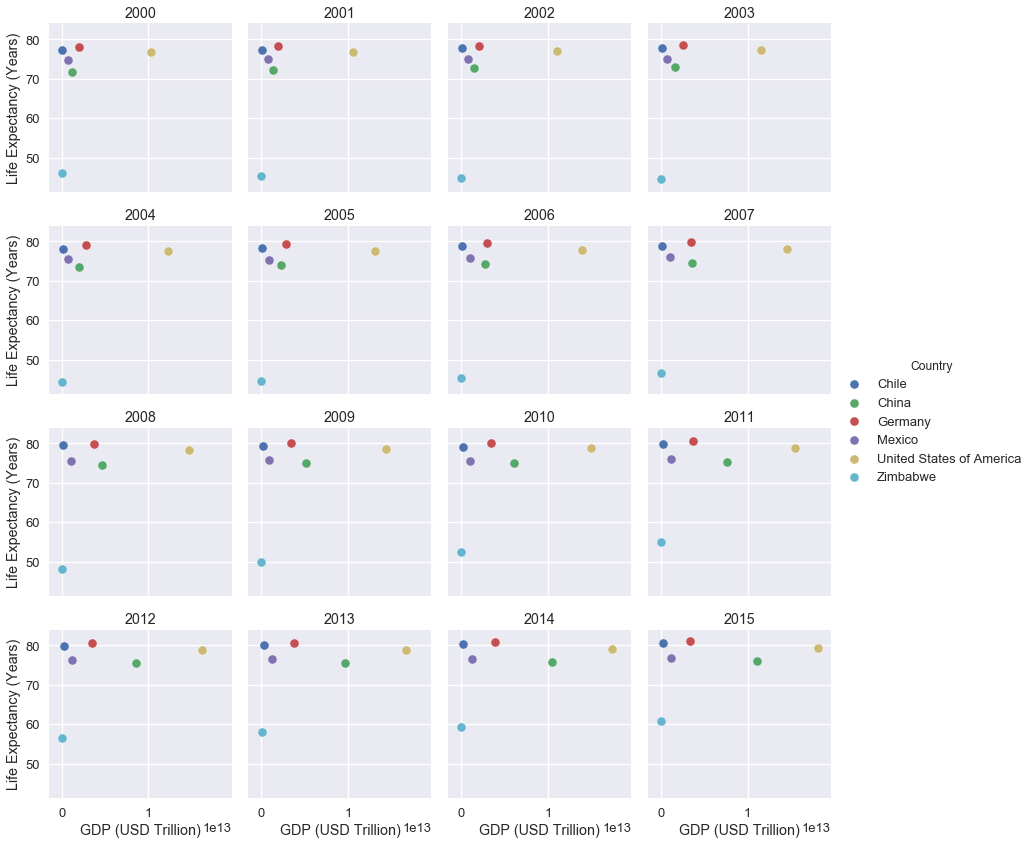

In [241]:
# WORDBANK:
# "Year"
# "Country" 
# "GDP" 
# "LEABY" 
# plt.scatter
sns.set(style='darkgrid', rc={"grid.linewidth": 0.1})
sns.set_context("talk", font_scale=1) 

# Uncomment the code below and fill in the blanks
g = sns.FacetGrid(data=df, col='Year', hue='Country', col_wrap=4, size=3)
g = (g.map(plt.scatter, 'GDP', 'LEABY', edgecolor="w").add_legend().set_titles("{col_name}").set_xlabels('GDP (USD Trillion)').set_ylabels('Life Expectancy (Years)'))

# Create a title
#plt.subplots_adjust(top=0.92)
#g.fig.suptitle('Life Expectancy at Birth in various Countries as a function of GDP')

# Save the figure
plt.savefig('facetScatter.png')

plt.show()

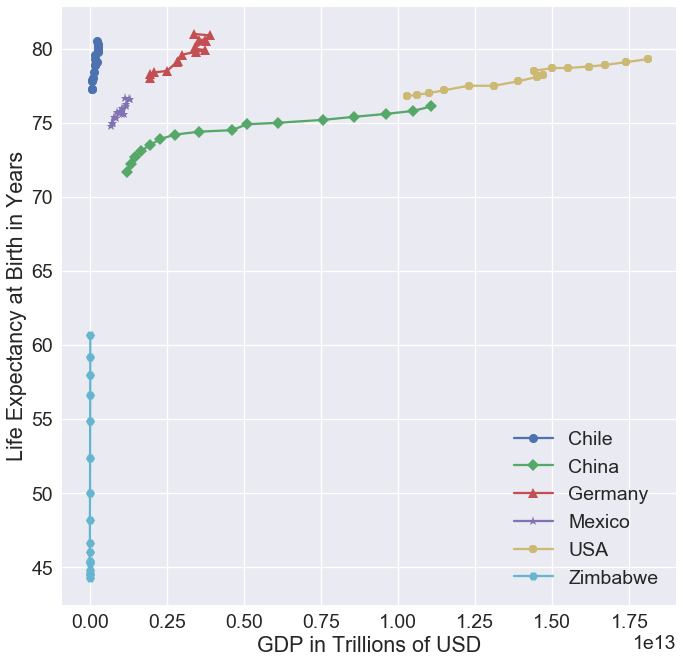

In [252]:
# Put the above onto a single line plot with multiple lines
sns.set(style='darkgrid', rc={"grid.linewidth": 0.1})
sns.set_context("talk", font_scale=1.5) 

# Split out the data by country
chile = df[df.Country == 'Chile']
china = df[df.Country == 'China']
germany = df[df.Country == 'Germany'] 
mexico = df[df.Country == 'Mexico']
usa = df[df.Country == 'United States of America']
zimbabwe = df[df.Country == 'Zimbabwe']

# Create a figure
f, ax = plt.subplots(figsize=(11, 11)) 

# Plot each country's data as a line
plt.plot('GDP', 'LEABY', data=chile, marker='o')
plt.plot('GDP', 'LEABY', data=china, marker='D')
plt.plot('GDP', 'LEABY', data=germany, marker='^')
plt.plot('GDP', 'LEABY', data=mexico, marker='*')
plt.plot('GDP', 'LEABY', data=usa, marker='8')
plt.plot('GDP', 'LEABY', data=zimbabwe, marker='H')

# Label the axes and graph
plt.xlabel('GDP in Trillions of USD')
plt.ylabel('Life Expectancy at Birth in Years')
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
#plt.title('Life Expectancy at Birth as a function of GDP over time')

# Save the figure
plt.savefig('multiLine_LEABY_GDP.png')

# Show the plot
plt.show()

+ Which country moves the most along the X axis over the years?
+ Which country moves the most along the Y axis over the years?
+ Is this surprising?
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 

* China just beats the USA on the rise in GDP.
* Zimbabwe moves the most along the Y axis. It is almost vertical, indicating a large change in LEABY, but no real change in GDP.
* It depends on one's expectations. GDP in China rises, but not for everyone. Furthermore, the GDP rises have come from pollution-rich industries such as coal and steel, which would keep the LEABY from rising alongside the GDP. In Zimbabwe, the LEABY has risen, but the GDP has remained roughly the same. However, the violin plots show that the life-expectancy is distributed over a huge range, indicating inequality.
* The scatter plots were not very easy to read, as it was difficult to spot just how far China moved along the X axis. So I combined the data into a single multi-line plot instead. Slopes (and thus correlation) are now easier to spot.

## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 

FacetGrid also allows you to do that! Instead of passing in `plt.scatter` as your Matplotlib function, you would have to pass in `plt.plot` to see a line graph. A few other things have to change as well. So we have created a different codesnippets with fill in the blanks.  that makes use of a line chart, and we will make two seperate FacetGrids for both GDP and Life Expectancy separately.

Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up by Country
3. We want to use a Matplotlib line plot to visualize the different graphs


Be sure to show your plot!



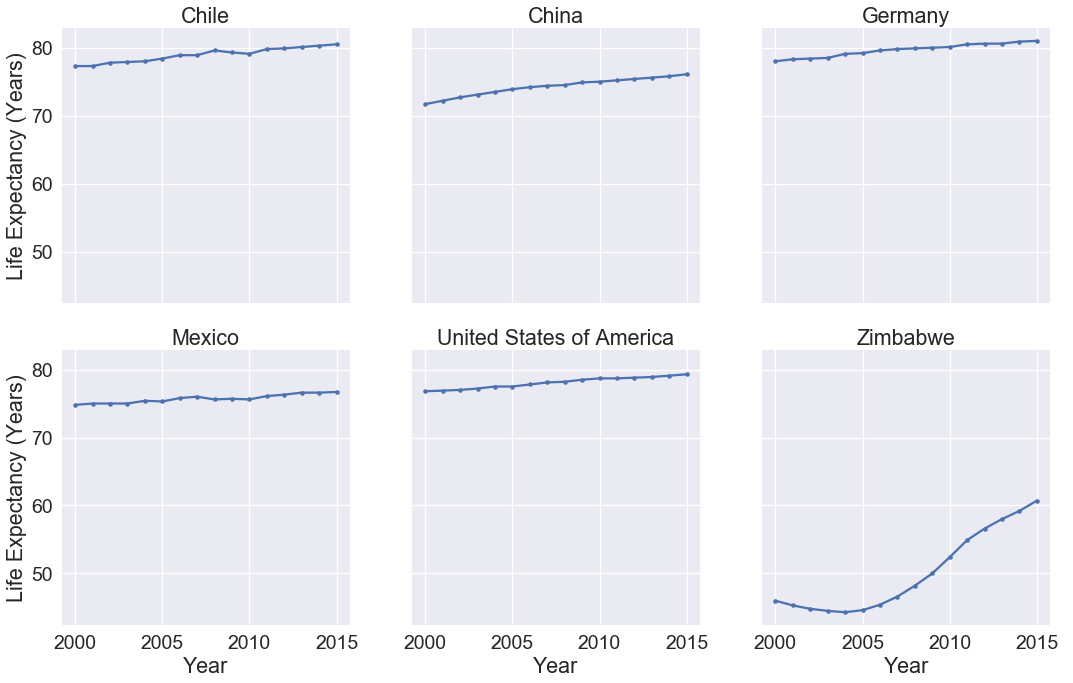

In [245]:
# WORDBANK:
# plt.plot
# "LEABY"
# "Year"
# "Country"

sns.set(style='darkgrid', rc={"grid.linewidth": 0.1})
sns.set_context("talk", font_scale=1.5) 

# Uncomment the code below and fill in the blanks
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=5)
g3 = (g3.map(plt.plot, "Year", "LEABY", marker='.').add_legend().set_titles("{col_name}").set_ylabels('Life Expectancy (Years)'))

# Create a title
#plt.subplots_adjust(top=0.92)
#g3.fig.suptitle('Life Expectancy at Birth per Country over Time')

# Save the figure
plt.savefig('facetLEABY.png')

plt.show()

What are your first impressions looking at the visualized data?

- Which countries' line changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in life expectancy over time? 
- Can you think of any reasons that the data looks like this for particular countries?

 * Zimbabwe has the highest rate of change in LEABY
 * 2005-15 has the largest rate of change for Zimbabwe
 * Mexico has the lowest rate of change in LEABY
 * Zimbabwe has an unstable economy with a largely corrupt government. It achieved independence in 1980, and has suffered in-fighting along tribal lines since that time. This corruption has led to a contraction of the economy and large numbers of public-health issues such as cholera outbreaks from unclean drinking water. Moreover, HIV/AIDS took a heavy toll in much of Africa, but Zimbabwe has embarked on extensive promotion of contraception to fight this.

## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


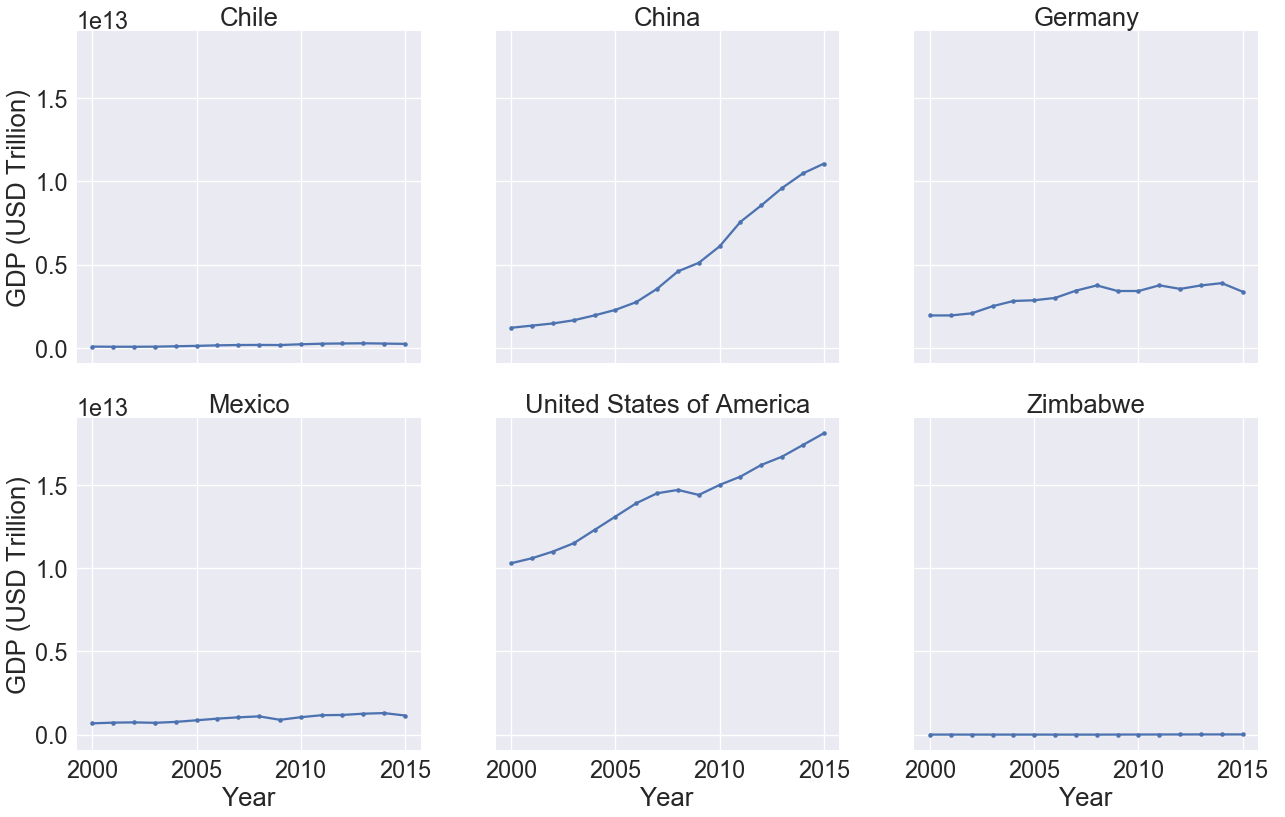

In [251]:
sns.set(style='darkgrid', rc={"grid.linewidth": 0.1})
sns.set_context("talk", font_scale=1.8) 

g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=6)
g3 = (g3.map(plt.plot, "Year", "GDP", marker=".").add_legend().set_titles("{col_name}").set_ylabels('GDP (USD Trillion)'))

# Create a title
#plt.subplots_adjust(top=0.92)
#g3.fig.suptitle('GDP per Country over Time')

# Save the figure
plt.savefig('facetGDP.png')

plt.show()

Which countries have the highest and lowest GDP?

* Zimbabwe, Chile, and Mexico have the lowest GDP
* USA, China, and Germany have the highest GDP

Which countries have the highest and lowest life expectancy?

* Zimbabwe has the lowest life expectancy by far.
* Germany and Chile have the highest life expectancies.


## Step 11 Researching Data Context 

Based on the visualization, choose one part the data to research a little further so you can add some real world context to the visualization. You can choose anything you like, or use the example question below.

What happened in China between in the past 10 years that increased the GDP so drastically?

The Beijing Consensus (aka The China Model), which was implemented after Mao Zedong's death in 1976, has led to massive increases in GNP & GDP since that time. A lot has been driven by pollution-causing steel & coal industries.

## Step 12 Create Blog Post

Use the content you have created in this Jupyter notebook to create a blog post reflecting on this data.
Include the following visuals in your blogpost:

1. The violin plot of the life expectancy distribution by country
2. The facet grid of scatter graphs mapping GDP as a function Life Expectancy by country
3. The facet grid of line graphs mapping GDP by country
4. The facet grid of line graphs mapping Life Expectancy by country


We encourage you to spend some time customizing the color and style of your plots! Remember to use `plt.savefig("filename.png")` to save your figures as a `.png` file.

When authoring your blog post, here are a few guiding questions to guide your research and writing:
+ How do you think the histories and the cultural values of each country relate to its GDP and life expectancy?
+ What would have helped make the project data more reliable? What were the limitations of the dataset?
+ Which graphs better illustrate different relationships??

# Blog post URL

https://mixtwitch.wordpress.com/2018/07/09/more-money-does-not-equal-more-life/